In [1]:
from google.colab import files


uploaded = files.upload()


Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import pandas as pd
df =pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## **Data** **Preprocessing**

In [3]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
df["Taxable.Income"].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

labelling Taxable.Income <= 30000 as "Risky"
and remaining other Taxable.Income as "Good"

In [5]:
tax_income = []
for value in df["Taxable.Income"]:
  if value <= 30000:
    tax_income.append("Risky")
  else:
    tax_income.append("Good")
df["tax_income"] = tax_income

In [6]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
x = df.drop(df.columns[[6]],axis = 1)
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
y = df["tax_income"]
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: tax_income, dtype: object

## **Data** **Transformation**

In [9]:
ssx = df[["Taxable.Income","City.Population","Work.Experience"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(ssx)
ss = pd.DataFrame(ss)
ss.columns = list(ssx)
ss.head()

,Taxable.Income,City.Population,Work.Experience
0,0.520362,-1.178521,-0.629143
1,-0.821464,0.508500,0.276370
2,-0.698292,1.033109,1.634639
3,-0.191666,1.696831,-0.063197
4,0.985129,-1.630532,1.408261


In [10]:
import warnings
with warnings.catch_warnings():
    # Setting values in-place is fine, ignore the warning in Pandas >= 1.5.0
    # This can be removed, if Pandas 1.5.0 does not need to be supported any longer.
    # See also: https://stackoverflow.com/q/74057367/859591
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=(
            ".*will attempt to set the values inplace instead of always setting a new array. "
            "To retain the old behavior, use either.*"
        ),
    )

pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat =df[df.columns[[0,1,5]]]
df_cat.iloc[:,0] = le.fit_transform(df_cat.iloc[:,0])
df_cat.iloc[:,1]= le.fit_transform(df_cat.iloc[:,1])
df_cat.iloc[:,2]= le.fit_transform(df_cat.iloc[:,2])
df_cat

,Undergrad,Marital.Status,Urban
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0
...,...,...,...
595,1,0,1
596,1,0,1
597,0,0,1
598,1,1,0


In [11]:
df1 = pd.concat([ss,df_cat],axis = 1)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0.520362,-1.178521,-0.629143,0,2,1
1,-0.821464,0.508500,0.276370,1,0,1
2,-0.698292,1.033109,1.634639,0,1,1
3,-0.191666,1.696831,-0.063197,1,2,1
4,0.985129,-1.630532,1.408261,0,1,0
...,...,...,...,...,...,...
595,0.807075,-1.390432,-0.968710,1,0,1
596,0.563672,-1.071672,-1.534655,1,0,1
597,-0.300744,0.909696,-1.761033,0,0,1
598,1.656940,1.432197,0.163181,1,1,0


In [12]:
x = df1
y =df["tax_income"]
y.head()
x.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0.520362,-1.178521,-0.629143,0,2,1
1,-0.821464,0.508500,0.276370,1,0,1
2,-0.698292,1.033109,1.634639,0,1,1
3,-0.191666,1.696831,-0.063197,1,2,1
4,0.985129,-1.630532,1.408261,0,1,0


## **Data** **Partition**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2)


## **Decision Tree Classifier (CART) Using "Gini" Method**

In [14]:
from ast import DictComp
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = "gini",max_depth =5)
dct.fit(x_train,y_train)
y_pred_train = dct.predict(x_train)
y_pred_train
y_pred_test = dct.predict(x_test)
y_pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', '

In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc.round(3))
acc = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc.round(3))

The training accuracy score is: 1.0
The testing accuracy score is: 0.998


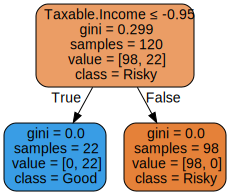

In [16]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(dct,filled = True,rounded = True,special_characters = True,feature_names= ["Taxable.Income","City.Population","Work.Experience","Undergrad","Marital.Status","Urban"], class_names= ['Risky', 'Good'])
graph = graphviz.Source(data)
graph

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(y_test,y_pred_test)
print("The confusion matrix of testing data:\n",cm1)
cm = confusion_matrix(y_train,y_pred_train)
print("The confusion matrix of training data :\n",cm)

The confusion matrix of testing data:
 [[377   1]
 [  0 102]]
The confusion matrix of training data :
 [[98  0]
 [ 0 22]]


From above decision tree, we can conclude that there are 98 people are detected as "Risky" and 22 people are detected as "Good"

Classification Report               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       378
       Risky       0.99      1.00      1.00       102

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



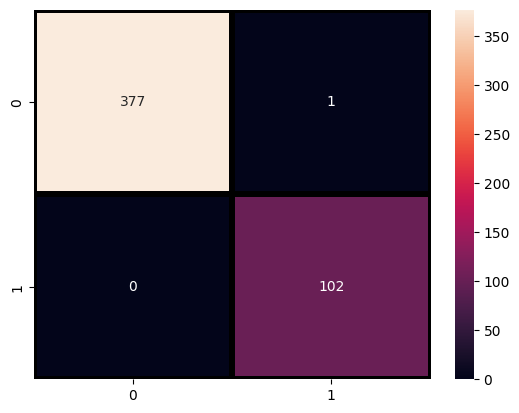

In [33]:
sns.heatmap(cm1,annot = True,fmt = "d",linecolor ="k",linewidths = 3)
print("Classification Report",classification_report(y_test,y_pred_test))

Classification Report               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        98
       Risky       1.00      1.00      1.00        22

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



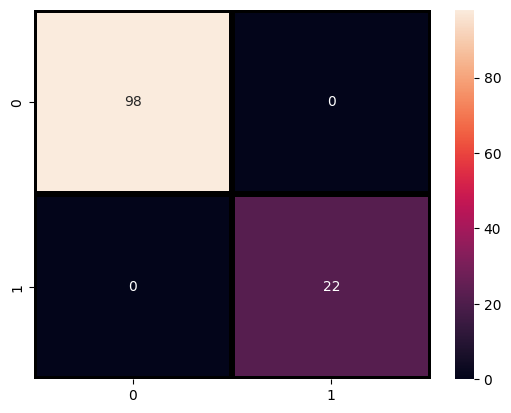

In [34]:
sns.heatmap(cm,annot = True,fmt = "d",linecolor ="k",linewidths = 3)
print("Classification Report",classification_report(y_train,y_pred_train))

## **Model Validation**

In [44]:
t =[[67890,50000,10,0,3,1]]
y = dct.predict(t)
y

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)